In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Load processed data 
base_path = '../source/'
final_visitor_data = pd.read_csv(os.path.join(base_path, 'processed_visitors_answers.csv'))
final_visitor_data

,visitor_id,visitor_email,visitor_gender,questionId,questionText,answerId,answerText,answerTypeId
0,67b70a9f2d21f543a1096602,emilija+100_L8gA@bss.mk,F,5c8a78336d41a10da4f730fe,Reason for Attending the Event,5c8a78336d41a10da4f73100,To obtain general information,Answer
1,67b70a9f2d21f543a1096602,emilija+100_L8gA@bss.mk,F,5c8a78336d41a10da4f73227,Which of the following best describes your job...,5c8a78336d41a10da4f73244,Media,Answer
2,67b70a9f2d21f543a1096602,emilija+100_L8gA@bss.mk,F,5c8a78336d41a10da4f73253,Please indicate your company's main area of bu...,5c8a78336d41a10da4f73291,Travel Agent,Answer
3,67b70a9f2d21f543a1096602,emilija+100_L8gA@bss.mk,F,5c8a78336d41a10da4f7336d,What role do you play in the purchasing decisi...,5c8a78336d41a10da4f73371,No influence,Answer
4,67ada1ee197e604dd2722d1b,aleksandar.dimkov+mitt1_n5eA@bss.com.mk,M,5c8a78336d41a10da4f730fe,Reason for Attending the Event,5c8a78336d41a10da4f730ff,To source products and services,Answer
...,...,...,...,...,...,...,...,...
356,uud1nluegdqmisnfzpg75iqg,daniela.p+200_IzcX_QOfF@bss.com.mk,M,5c8a78336d41a10da4f7336d,What role do you play in the purchasing decisi...,5c8a78336d41a10da4f73370,Advisory role,Answer
357,mv0j9yovwhgmtif9l1naciko,daniela.p+200_IzcX_CIHU@bss.com.mk,M,5c8a78336d41a10da4f730fe,Reason for Attending the Event,5c8a78336d41a10da4f73100,To obtain general information,Answer
358,mv0j9yovwhgmtif9l1naciko,daniela.p+200_IzcX_CIHU@bss.com.mk,M,5c8a78336d41a10da4f73227,Which of the following best describes your job...,5c8a78336d41a10da4f7323d,Guided tour services,Answer
359,mv0j9yovwhgmtif9l1naciko,daniela.p+200_IzcX_CIHU@bss.com.mk,M,5c8a78336d41a10da4f73253,Please indicate your company's main area of bu...,5c8a78336d41a10da4f73291,Travel Agent,Answer


## Univariate Analysis

visitor_gender
M    55
F    45
Name: count, dtype: int64


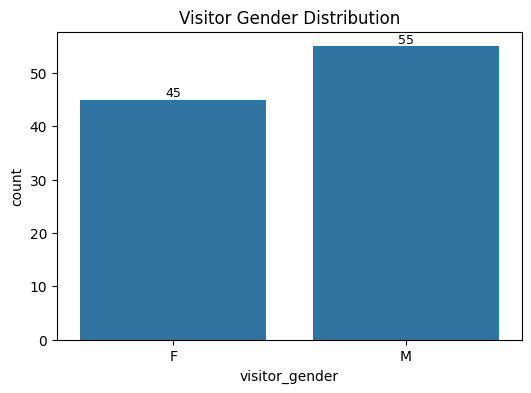

In [5]:
#Visitor Demographics Analysis

gender_counts = final_visitor_data[['visitor_id', 'visitor_gender']].drop_duplicates()['visitor_gender'].value_counts()
print(gender_counts)
# Create the plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=final_visitor_data[['visitor_id', 'visitor_gender']].drop_duplicates(),
    x='visitor_gender'
)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

# Set title and show the plot
plt.title('Visitor Gender Distribution')
plt.show()


Analysis: Top Answers for Each Question
Found 5 unique questions to analyze.

----------------------------------------------
## Top 5 Answers for Question:
   'Reason for Attending the Event'
----------------------------------------------
answerText
To source products and services     35
To obtain general information       24
To promote products and services    20
Personal interest                   13
Educational purposes                 8
Name: count, dtype: int64


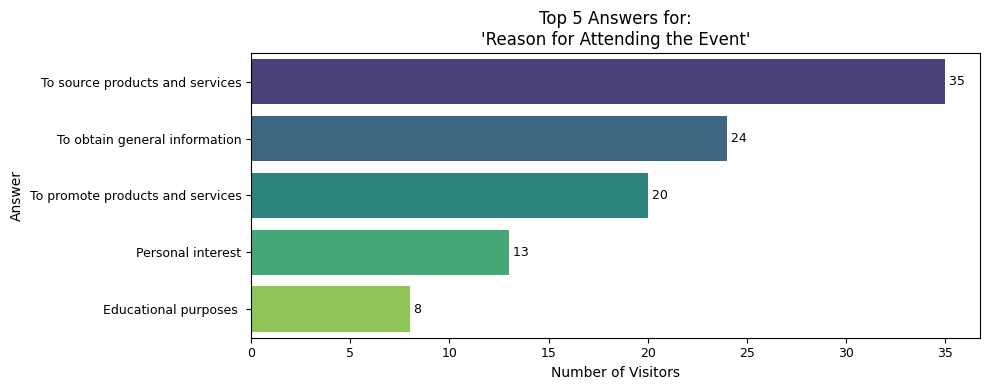


----------------------------------------------
## Top 5 Answers for Question:
   'Which of the following best describes your job function?'
----------------------------------------------
answerText
Visa support                     16
Sales                            15
Media                             8
Formation of tourist products     6
Guided tour services              6
Name: count, dtype: int64


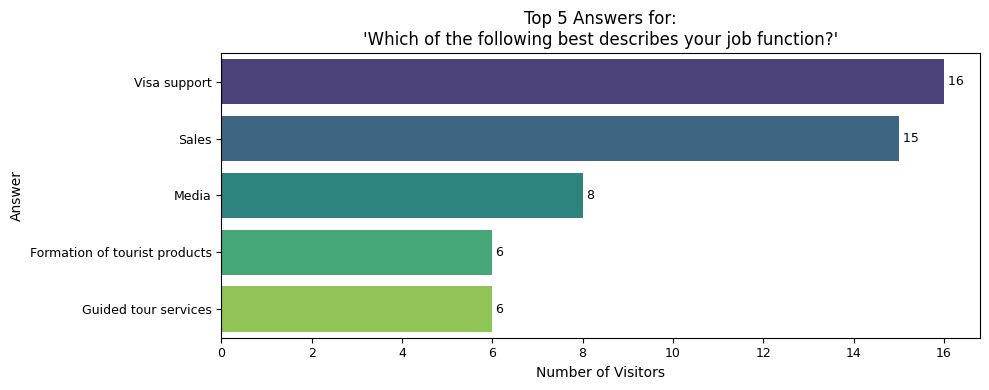


----------------------------------------------
## Top 5 Answers for Question:
   'Please indicate your company's main area of business'
----------------------------------------------
answerText
Travel Agent                        54
Tour Operator                       19
Event management                     9
IT solutions for travel industry     3
Accommodation Provider               2
Name: count, dtype: int64


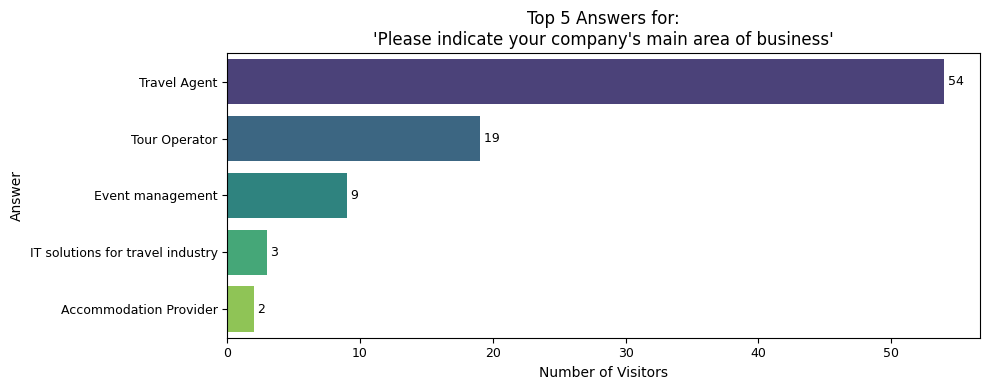


----------------------------------------------
## Top 5 Answers for Question:
   'What role do you play in the purchasing decision making process?'
----------------------------------------------
answerText
No influence            30
Advisory role           27
Joint responsibility    18
Sole responsibility     12
Name: count, dtype: int64


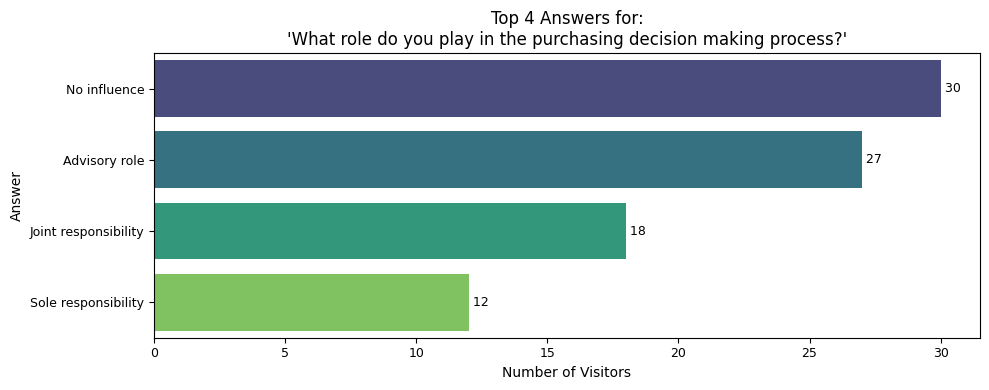


----------------------------------------------
## Top 5 Answers for Question:
   'What is your company's annual purchasing budget?'
----------------------------------------------
answerText
Up to 1 million rubles    18
5 - 10 million rubles      6
1 - 5 million rubles       6
Name: count, dtype: int64


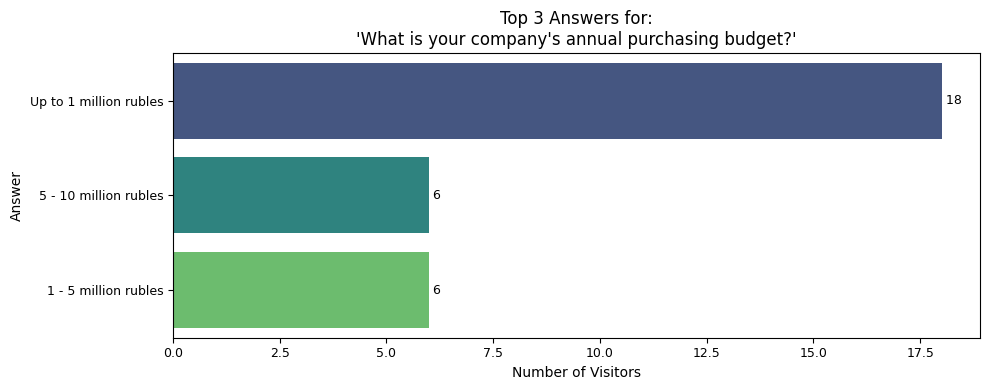

In [6]:
print("\n==============================================")
print("Analysis: Top Answers for Each Question")
print("==============================================")

# Get unique question texts
unique_questions = final_visitor_data['questionText'].unique()
print(f"Found {len(unique_questions)} unique questions to analyze.")

# Define how many top answers to show per question
top_n = 5 

for question in unique_questions:
    print(f"\n----------------------------------------------")
    print(f"## Top {top_n} Answers for Question:")
    print(f"   '{question}'")
    print(f"----------------------------------------------")

    # Filter data for the current question
    question_specific_data = final_visitor_data[final_visitor_data['questionText'] == question]

    # Calculate value counts for the answers to this specific question
    answer_counts = question_specific_data['answerText'].value_counts()
    # Get the top N answers
    top_answers = answer_counts.nlargest(top_n)

    print(top_answers)

    plt.figure(figsize=(10, max(4, len(top_answers) * 0.5))) # Adjust height based on N
    sns.barplot(x=top_answers.values, y=top_answers.index, orient='h', palette='viridis', hue =top_answers.index)
    plt.title(f"Top {len(top_answers)} Answers for:\n'{question}'", fontsize=12)
    plt.xlabel("Number of Visitors", fontsize=10)
    plt.ylabel("Answer", fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    # Add counts on bars
    for index, value in enumerate(top_answers.values):
        plt.text(value, index, f' {value}', va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

## Multi Variate Analysis

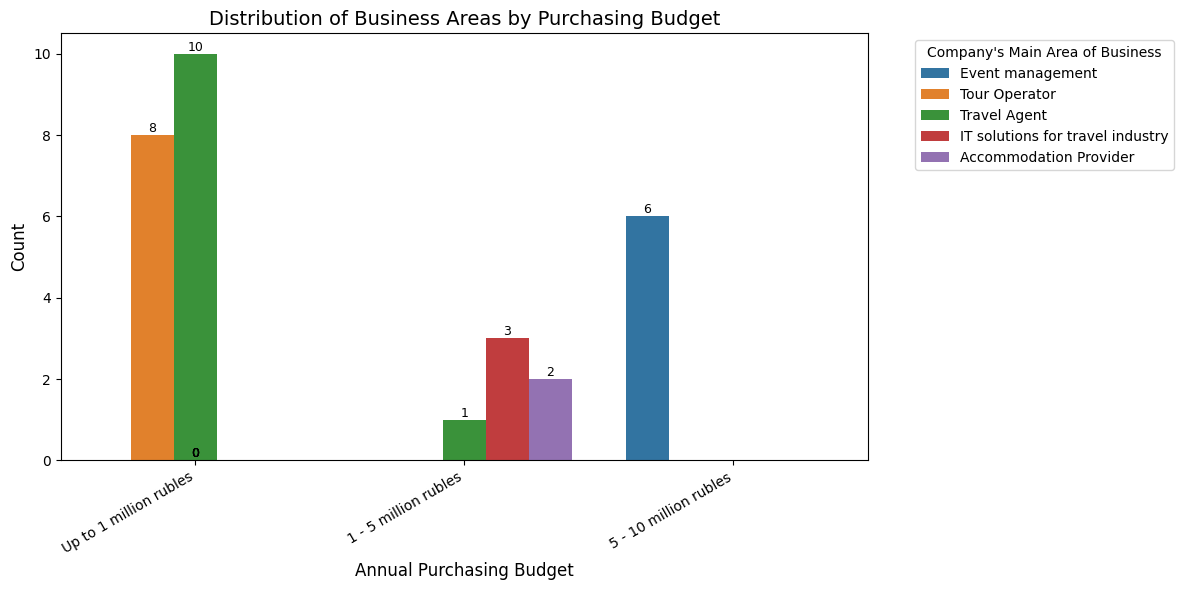

In [ ]:
# Distribution of Business Areas by Purchasing Budget

# Filter relevant data
q1 = "What is your company's annual purchasing budget?"
q2 = "Please indicate your company's main area of business"

filtered_df = final_visitor_data[final_visitor_data["questionText"].isin([q1, q2])]

# Pivot the data to get each visitor's responses
pivot_df = filtered_df.pivot(index="visitor_id", columns="questionText", values="answerText").reset_index()

# Drop rows with missing values for the selected questions
pivot_df = pivot_df.dropna(subset=[q1, q2])

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=pivot_df,
    x=q1,
    hue=q2,
    order=["Up to 1 million rubles", "1 - 5 million rubles", "5 - 10 million rubles"],
)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Convert count to integer
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position on top
        ha='center', va='bottom', fontsize=9,
    )

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha="right")

# Add title and labels
plt.title("Distribution of Business Areas by Purchasing Budget", fontsize=14)
plt.xlabel("Annual Purchasing Budget", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Company's Main Area of Business", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.tight_layout()
plt.show()

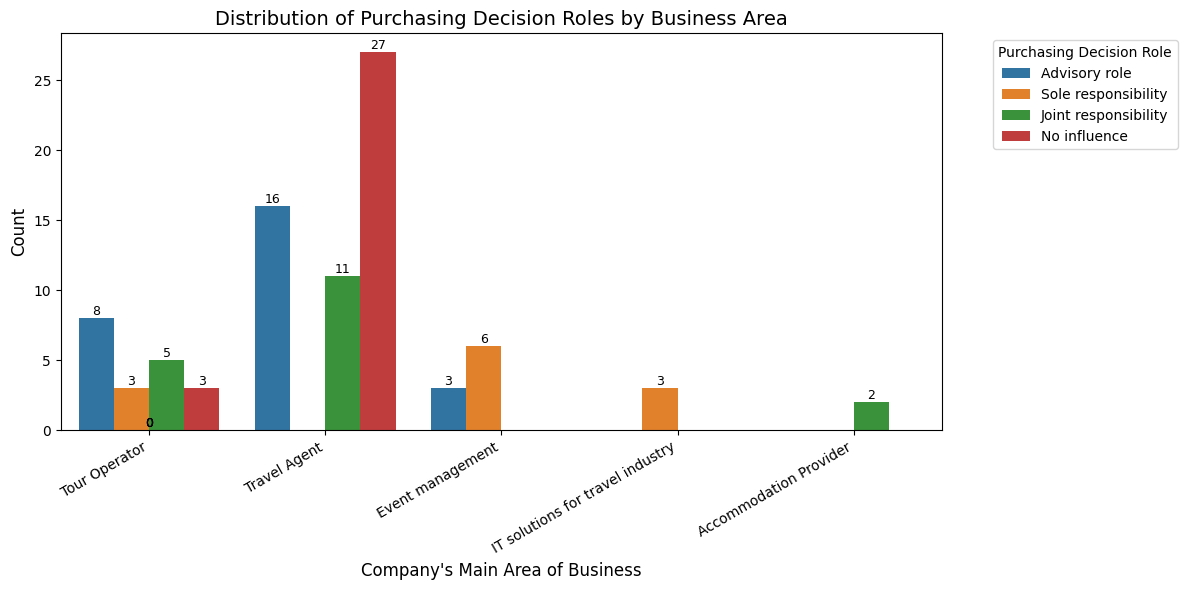

In [14]:
# Filter relevant data
q1 = "Please indicate your company's main area of business"
q2 = "What role do you play in the purchasing decision making process?"

filtered_df = final_visitor_data[final_visitor_data["questionText"].isin([q1, q2])]

# Pivot the data to get each visitor's responses
pivot_df = filtered_df.pivot(index="visitor_id", columns="questionText", values="answerText").reset_index()

# Drop rows with missing values for the selected questions
pivot_df = pivot_df.dropna(subset=[q1, q2])

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=pivot_df,
    x=q1,
    hue=q2,
)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Convert count to integer
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position on top
        ha='center', va='bottom', fontsize=9,
    )

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha="right")

# Add title and labels
plt.title("Distribution of Purchasing Decision Roles by Business Area", fontsize=14)
plt.xlabel("Company's Main Area of Business", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Purchasing Decision Role", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.tight_layout()
plt.show()